## kNN Decision Boundaries Exploration

This notebook will allow you to explore what a kNN classification decision boundary looks like for different values of $k$. 
We do this by first creating some training:

In [51]:
from sklearn.datasets import make_classification

X_train, y_train = make_classification(n_samples = 10, n_features = 2, n_redundant = 0, random_state=32)

We now visualize the training data with each training sample coloured according to its class. Here, yellow = 1 and purple = 0.

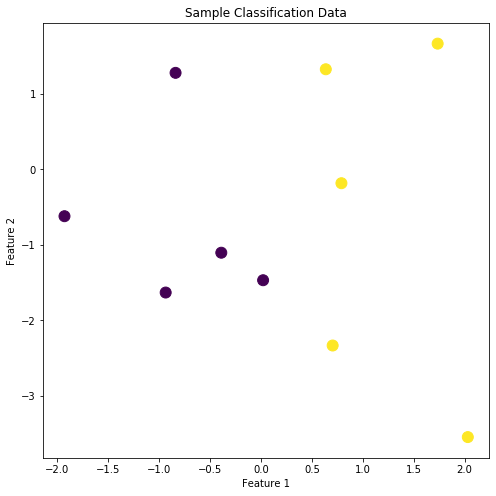

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], s=120, c = y_train)
plt.title("Sample Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

We create a kNN classifier and train/fit it on our training data.  

In [53]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Now we create a grid of points that will cover the plotting area. If we think of each one of these points as a test point and have our model predict which class it belongs to, we can visualize the decision boundary for our classifier.  

First step: create a grid of points and save that in an array called `X_test`:

In [54]:
import numpy as np

f1_values = np.linspace(-2.0, 2.0, num=80)
f2_values = np.linspace(-4.0, 2.0, num=80)

feature_1_test, feature_2_test = np.meshgrid(f1_values, f2_values)
feature_1_test = np.ravel(feature_1_test)
feature_2_test = np.ravel(feature_2_test)

X_test = np.stack((feature_1_test, feature_2_test)).T

Second step: have our kNN model predict the class for each of these points in our grid.

In [55]:
y_preds = clf.predict(X_test)

Third step: plot the grid of points and colour them based on the predicted class. 

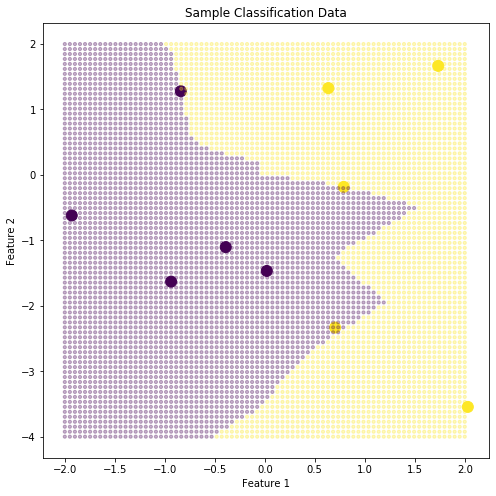

In [56]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=120, c = y_train)
plt.scatter(feature_1_test, feature_2_test, s=10, c = y_preds, alpha=0.3)
plt.title("Sample Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

Now go back and change the value of $k$ and see how the decision boundary changes. 